### EDA on Lending Club Case Study


**Data Description:**

The data given below contains information about past loan applicants .

**Objective**
- Analysing the pattern of loan defaulters,the knowledge gained could be used by the Financial instuation in future risk assesment 


**EDA Steps Followed**:

**1. Data Overview**
   - loading the data
   - Data volume
   
   
**2. Data Cleaning**
   - Fix rows and columns 
   - Missing Values
   - Standardise data
   - Fix invalid values
  
**3.Derived Metrics**
  - Type Driven Metrics
  - Buisness Driven Metrics
  
**4. Data Content Analysis**
   - Univariate Analysis
   - Segmented Analysis
   - Bivariate Analysis
   - Correlation b/w features

**5. Conclusion**


## 1. Data Overview

In [1]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## reading loan data
loan_df = pd.read_csv("loan.csv")

In [3]:
### to have a glimpse of a data set
print("Rows = ", loan_df.shape[0], "and Columns = ", loan_df.shape[1])
print("Here is some sample records from top and bottom...")
loan_df.head(5).append(loan_df.tail(5))

Rows =  39717 and Columns =  111
Here is some sample records from top and bottom...


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.Data Cleaning 

**2.1 Fix rows and columns**
   - Unecessary Rows and Columns
   - Unique Identifier
   - Duplicate Rows
   - Irrelevant Feature
   - Filter Data

In [4]:
## to find the percentage of null values in each column
loan_df.isnull().sum()*100/len(loan_df)


id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [5]:
## to drop the columns where all the values are null 
loan_df = loan_df.dropna(axis = 1, how = 'all')

In [6]:
### number of coulumns has reduced from 111 to 57
loan_df.shape

(39717, 57)

In [7]:
## to drop the columns which has only one value
oneuniquecolumns= loan_df.columns[loan_df.nunique() == 1]
oneuniquecolumns


Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [8]:
loan_df=loan_df.drop(oneuniquecolumns,axis=1)

In [9]:
### drop the duplicate rows based on memberid
loan_df.duplicated(subset=['id']).any()

False

In [10]:
alluniquecolumns=loan_df.columns[(loan_df.nunique()*100/len(loan_df) )==100]
alluniquecolumns

Index(['id', 'member_id', 'url'], dtype='object')

In [11]:
loan_df.drop(alluniquecolumns,axis=1,inplace=True)

In [12]:

loan_df.drop([ "title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt","total_pymnt_inv","funded_amnt", "revol_bal", "out_prncp", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d","delinq_2yrs","pub_rec_bankruptcies"], axis = 1, inplace = True)

In [13]:
loan_df.shape

(39717, 24)

In [14]:
loan_df.isnull().sum()*100/len(loan_df)

loan_amnt                  0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.191303
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
open_acc                   0.000000
pub_rec                    0.000000
revol_util                 0.125891
total_acc                  0.000000
dtype: float64

In [15]:
loan_df.drop(['mths_since_last_record',"mths_since_last_delinq"],axis=1,inplace=True)

In [16]:
print(loan_df.emp_title.nunique())


28820


In [17]:
#### droping emp_title , it has lot of unique values
loan_df.drop(['emp_title'],axis=1,inplace=True)

In [18]:
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
loan_df.shape

(38577, 21)

**2.2 Missing Values**
- Checking and Imputing the Missing Values


<AxesSubplot:>

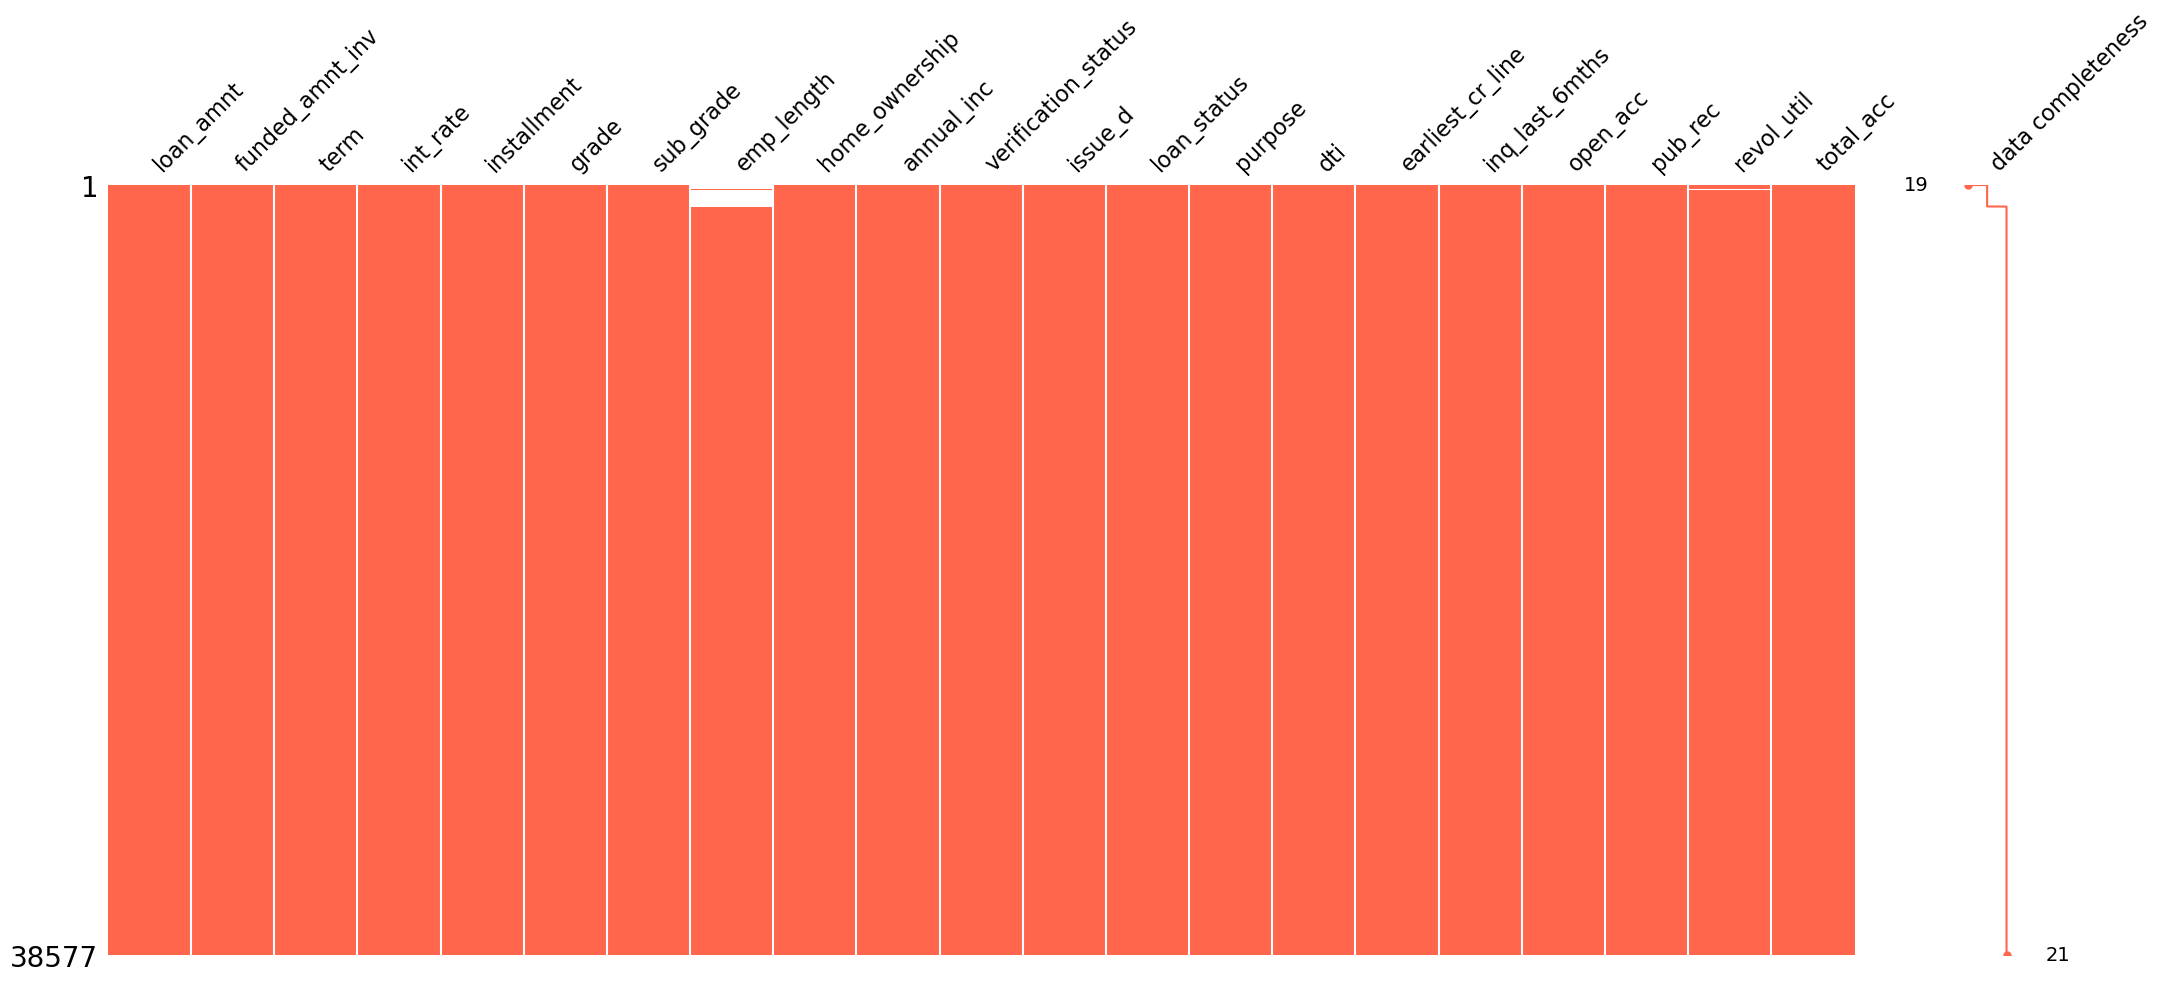

In [20]:
import missingno as msno
%matplotlib inline
msno.matrix(loan_df, labels=True, sort="ascending", color=(1, 0.4, 0.3))


###### Imputing null values 
- based on the above analysis  columns does not have 0% null values [emp_length,revol_util]
  - standerdising the data 
  - no of null values in the column, checking the skewness 
  - imputing the null values

###### Imputing null values on emp_length 

float64
10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64
count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64
no. of null values 1033


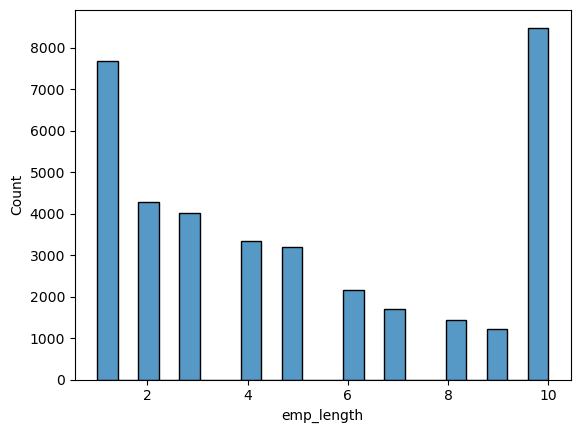

In [21]:

# Feature:emp_length

loan_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_df['emp_length']=loan_df['emp_length'].astype('float')
print(loan_df.emp_length.dtypes)
print(loan_df.emp_length.value_counts())
print(loan_df.emp_length.describe())
print("no. of null values",loan_df.emp_length.isnull().sum())
# hist plot on empl length variable
sns.histplot(loan_df.emp_length)

plt.show()


Considering **emp_length** to be categorical variable, the most frequent value is present in the bin 10 . Henceforth,we can replace the value with mode

In [22]:
# impute missing values in emp_length with mode.
print(loan_df.emp_length.mode()[0])
loan_df.emp_length=loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])

# Check the null values in emp_length
print(loan_df.emp_length.isnull().sum())

10.0
0


In [23]:
### Feature revol_util
loan_df.revol_util.replace(to_replace='%', value='', inplace=True, regex=True)
loan_df.revol_util=loan_df.revol_util.astype('float')
print(loan_df.revol_util.dtypes)
print(loan_df.revol_util.value_counts())
print(loan_df.revol_util.describe())
print(loan_df.revol_util.isnull().sum())

float64
0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64
count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64
50


**revol_util** is a continuous variable and it has skewness . Henceforth filling the null value with **median**

In [24]:
loan_df['revol_util'].fillna(loan_df['revol_util'].median(),inplace=True)
print(loan_df.revol_util.isnull().sum())

0


##### After data imputation , checking for all the missing values

<AxesSubplot:>

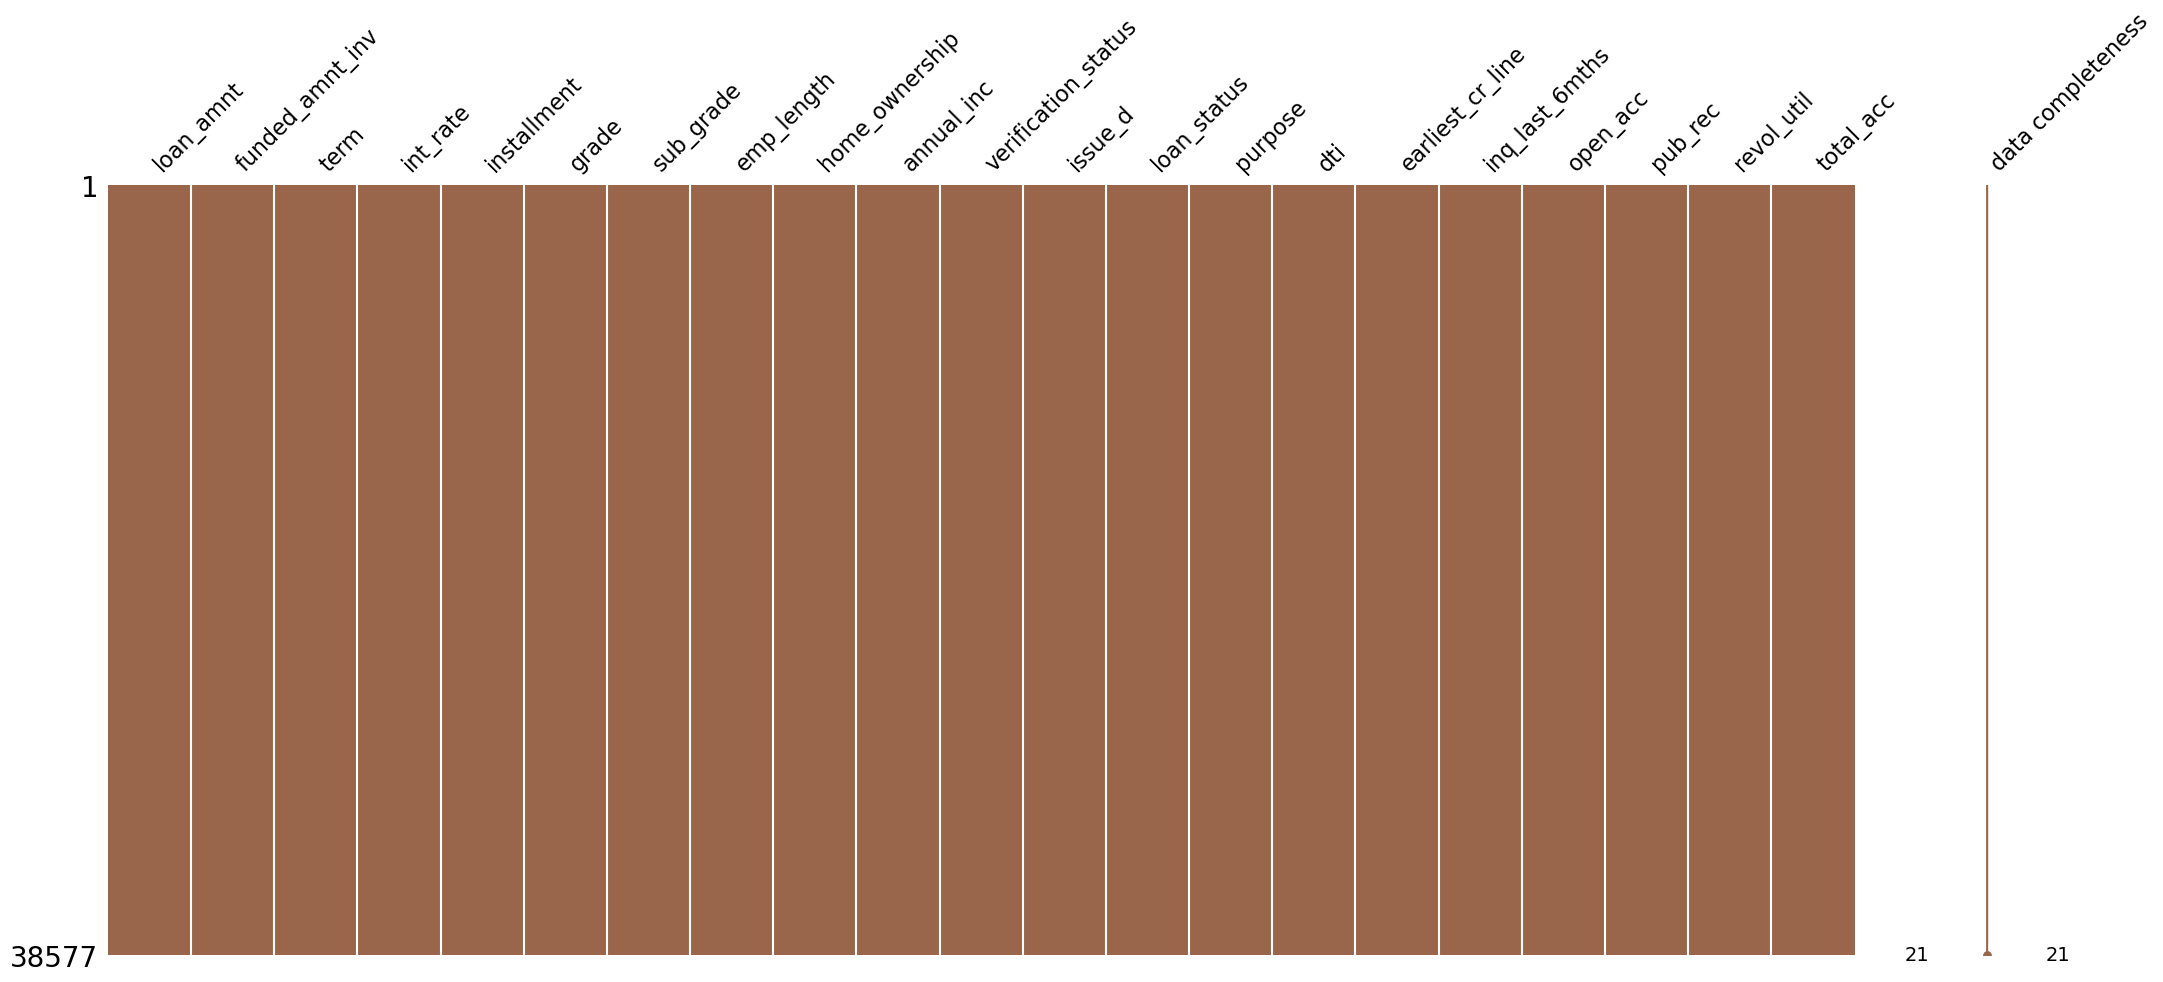

In [25]:
import missingno as msno
%matplotlib inline
msno.matrix(loan_df, labels=True, sort="ascending", color=(0.6, 0.4, 0.3))

**2.3 Standardise data**
-  Incorrect data types
-  Outliers detection and Removal

##### Converting to correct data type

In [26]:
### feature int_rate
loan_df.int_rate.replace(to_replace=['%'],value="",inplace=True,regex=True)
loan_df.int_rate=loan_df.int_rate.astype('float')

from datetime import datetime
### feature issue_d
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
### feature earliest_cr_line
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda x: datetime.strptime(x,'%b-%y'))

**Outlier detection and removal**

In [27]:
def Col_types(dataframe):
    loan_df_numerical=loan_df.select_dtypes(exclude="object")
    loan_df_categorical=loan_df.select_dtypes(include="object")
    loan_df_numerical_cols=loan_df_numerical.columns.tolist()
    loan_df_categoical_cols=loan_df_categorical.columns.tolist()
    return loan_df_categorical,loan_df_numerical

In [28]:
categorical_columns ,continuous_columns = Col_types(loan_df)
print("categorical_columns:=",categorical_columns.columns.tolist(), "\n continuous_columns:=",continuous_columns.columns.tolist())

categorical_columns:= ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose'] 
 continuous_columns:= ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


In [29]:
continuous_columns.describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10222.481123,11.932219,322.466318,5.193302,6.877797e+04,13.272727,0.871737,9.275423,0.055422,48.703292,22.052648
std,7348.441646,7022.720644,3.691327,208.639215,3.449311,6.421868e+04,6.673044,1.071546,4.401588,0.237804,28.346356,11.425861
min,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5300.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,25.200000,13.000000
50%,9600.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,49.100000,20.000000
75%,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,72.200000,29.000000
max,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000


In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    outlier_length=0
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers_values=((dataframe[col_name] < (low_limit)) |(dataframe[col_name] > (up_limit)))
    outlier_length=len(dataframe[outliers_values])
    if dataframe[outliers_values].any(axis=None):
        return True,outlier_length
    else:
        return False,outlier_length

def replace_with_thresholds(dataframe, variable,q1,q2):
    low_limit, up_limit = outlier_thresholds(dataframe, variable,q1,q2)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    print("(row,col)",dataframe.shape)
    
def remove_with_thresholds(dataframe,variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable,0.5,0.75)
    outliers_values=((dataframe[variable] < (low_limit)) |(dataframe[variable] > (up_limit)))
    print("(row,col)",dataframe.shape)
     


In [31]:
outliers = []
def detectoutliers():
    # Outlier detection for continuous variables
    for col in continuous_columns:
        print(f"{col} :  {check_outlier(loan_df, col)}")
        


In [32]:
detectoutliers()

loan_amnt :  (False, 0)
funded_amnt_inv :  (False, 0)
int_rate :  (False, 0)
installment :  (False, 0)
emp_length :  (False, 0)
annual_inc :  (True, 159)
issue_d :  (False, 0)
dti :  (False, 0)
earliest_cr_line :  (True, 85)
inq_last_6mths :  (True, 14)
open_acc :  (True, 4)
pub_rec :  (True, 9)
revol_util :  (False, 0)
total_acc :  (False, 0)


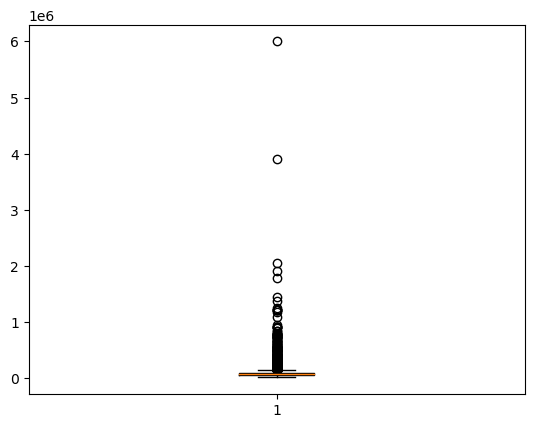

In [33]:
## feature annualinc 
plt.boxplot(loan_df['annual_inc'])
plt.show()


(row,col) (38577, 21)


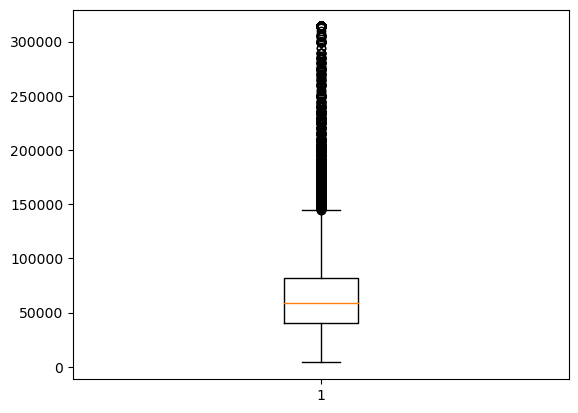

In [34]:
# for feature - annual_inc - any value above or below the outlier will be replaced to min and max respectively
replace_with_thresholds(loan_df, "annual_inc",0.05,0.95)
plt.boxplot(loan_df['annual_inc'])
plt.show()

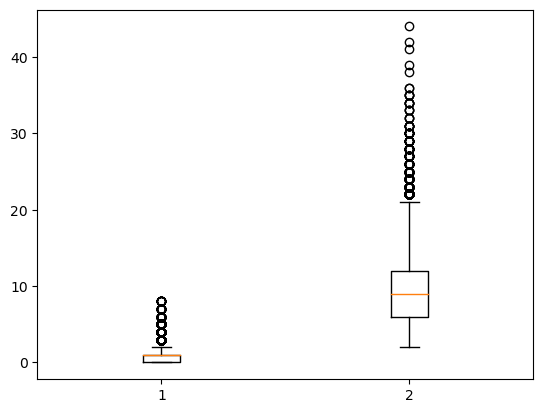

In [35]:
## feature inq_last_6mths, pub_rec_bankruptcies,open_acc,pub_rec
plt.boxplot(loan_df[['inq_last_6mths','open_acc']])
plt.show()


(row,col) (38577, 21)
(row,col) (38577, 21)


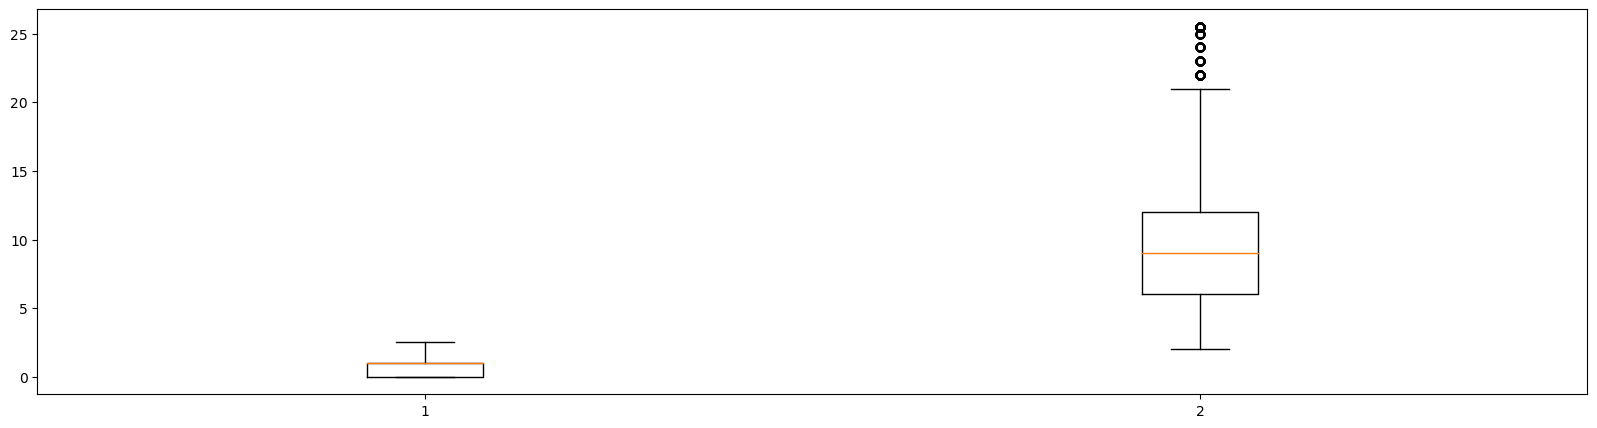

In [36]:
# for feature -  - any value above or below the outlier will be replaced to min and max respectively
columns=['inq_last_6mths','open_acc']
for col in columns:
    replace_with_thresholds(loan_df, col,0.05,0.75)
plt.figure(figsize=(20,5))
plt.boxplot(loan_df[['inq_last_6mths','open_acc']])
plt.show()

In [37]:
detectoutliers() 

loan_amnt :  (False, 0)
funded_amnt_inv :  (False, 0)
int_rate :  (False, 0)
installment :  (False, 0)
emp_length :  (False, 0)
annual_inc :  (False, 0)
issue_d :  (False, 0)
dti :  (False, 0)
earliest_cr_line :  (True, 85)
inq_last_6mths :  (False, 0)
open_acc :  (False, 0)
pub_rec :  (True, 9)
revol_util :  (False, 0)
total_acc :  (False, 0)


In [38]:
loan_df.shape

(38577, 21)

### Insights on Data Cleaning
#### 2.1 Droping below list of columns , since the below features do not add any value to the analysis 
- 1. Columns which have full null values.
- 2. Columns which have only one unique value.
- 3. Checking for duplicate records taking id as subset, no duplicate rows found
- 4. Coulumns where all values are unique. for instance id,member_id,url
- 5. Columns that do not contribute to check the analyis of defaulters list , it is mosly for post loan aproval stage
      [title, ip_code,addr_state,desc,last_credit_pull_d,out_prncp_inv,,total_pymnt,total_pymnt_inv,revol_bal,total_rec_prncp
      total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,delinq_2yrs,pub_rec_bankruptcies']
- 6.funded_amnt is removed as it is amount that is approved by the lending club and not by the investors.
- 7. Columns which has more 50% null values are droped. for instance::mths_since_last_record and mths_since_last_delinq
- 8.Records pertaining to Current are removed, as it is ambigous whether they would repay the amount or not
- 9.emp_title is droped as it has lot of unique values

#### 2.2 Missing values 
- based on the missingno analysis , 2 columns were found with more than 0% null values
- [emp_length,revol_util]
- emp_length was imputed with mode value
- revol_util were filled with median since it had skewness

#### 2.3 Standardise Data
- incorect data types are replaced with proper data type for the below columns
  - int_rate is converted to float object from string object
  - issue_d and earliest_cr_line is converted to datetime object 
- Detecting and Removing Outliers
   - data is categorised into numerical variable and categorical variable
   - outliers found in ['annual_inc','inq_last_6mths','open_acc'] were capped with min and max value

#### After Data cleaning , Size of the dataframe is (38577, 21)
  

## 3.1 Derived Metrics
- Type Driven Metrics
- Buisness Driven Metics

**3.1.1 Type Driven Metrics**


In [39]:
##### issue_d
#
# extracting month and year from issue_d
loan_df['issue_d_Month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['issue_d_Year'] = loan_df['issue_d'].apply(lambda x: x.year)

#earliest_cr_line
# extracting month and year from issue_d
loan_df['earliest_cr_line_Month'] = loan_df['earliest_cr_line'].apply(lambda x: x.month)
loan_df['earliest_cr_line_Year'] = loan_df['earliest_cr_line'].apply(lambda x: x.year)


**3.1.2 Buisness Driven Metrics**

##### new column  Loan amount ratio  is created , which would contain ratio of the amount which was approved by the invester (loan_amnt is the  amount requested by the borrower and funded_amnt_inv is the amount approved by the invester)

In [40]:
loan_df['approved_amount_ratio'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)

In [41]:
loan_df.head(3).append(loan_df.tail(3))

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_d_Month,issue_d_Year,earliest_cr_line_Month,earliest_cr_line_Year,approved_amount_ratio
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,...,1.0,3.0,0,83.7,9,12,2011,1,1985,99.50
1,2500,2500.0,60 months,15.27,59.83,C,C4,1.0,RENT,30000.0,...,2.5,3.0,0,9.4,4,12,2011,4,1999,100.00
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,...,2.0,2.0,0,98.5,10,12,2011,11,2001,100.00
39714,5000,1325.0,36 months,8.07,156.84,A,A4,1.0,MORTGAGE,100000.0,...,0.0,11.0,0,19.4,20,7,2007,10,1998,26.50
39715,5000,650.0,36 months,7.43,155.38,A,A2,1.0,MORTGAGE,200000.0,...,0.0,17.0,0,0.7,26,7,2007,11,1988,13.00
39716,7500,800.0,36 months,13.75,255.43,E,E2,1.0,OWN,22000.0,...,0.0,7.0,0,51.5,8,6,2007,10,2003,10.67


## 4 Data Content Analysis

### 4.1 Univariate analysis


In [42]:
categorical_columns ,continuous_columns = Col_types(loan_df)
print("categorical_columns:=",categorical_columns.columns.tolist(), "\ncontinuous_columns:=",continuous_columns.columns.tolist())

categorical_columns:= ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose'] 
continuous_columns:= ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'issue_d_Month', 'issue_d_Year', 'earliest_cr_line_Month', 'earliest_cr_line_Year', 'approved_amount_ratio']


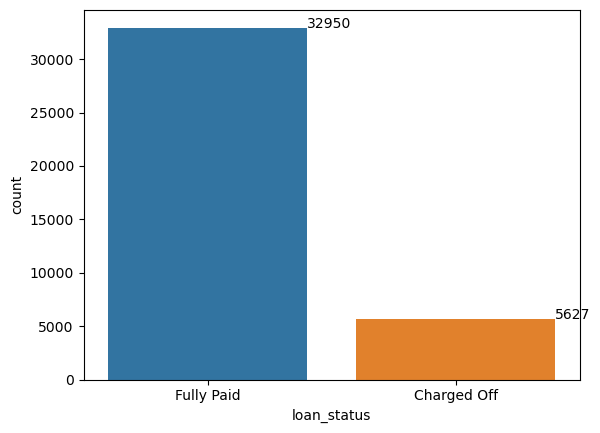

In [43]:
ax=sns.countplot(x ='loan_status', data=loan_df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width(), p.get_height()))

**Inference**:
    - only 5627 loan applicants have defaulted their loan

<AxesSubplot:xlabel='approved_amount_ratio', ylabel='Density'>

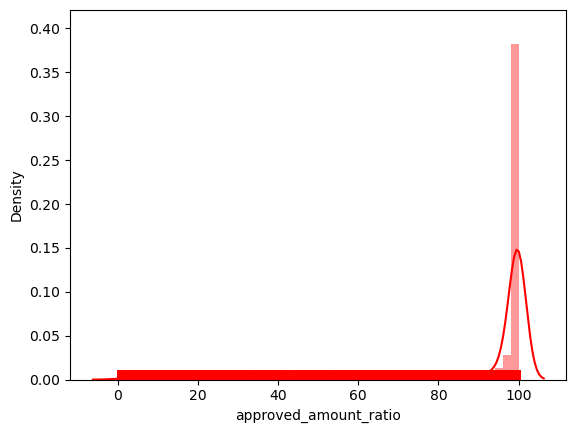

In [44]:
#to check for the percentage of the loan that was approved by the invester
sns.distplot(loan_df.approved_amount_ratio,color='red',rug=True)

##### more than 90% of the burrower's initial amount is  approved by  the Invester

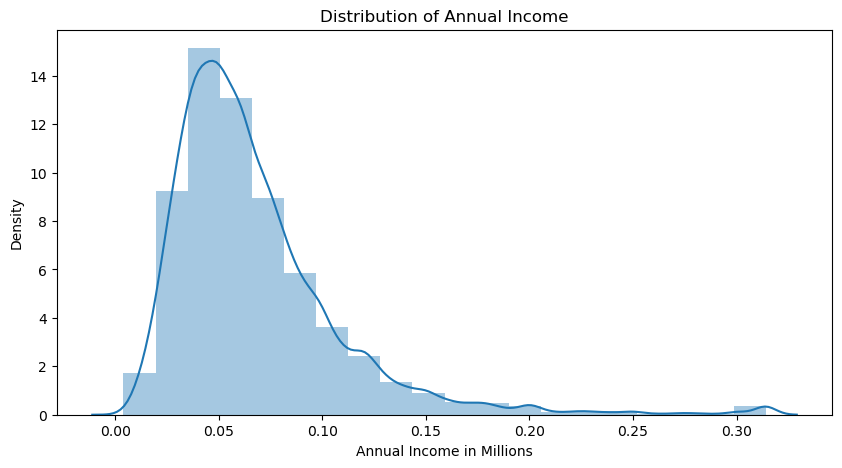

In [45]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_df.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

##### Data Binning

###### Analysing the way loan status varies across different category
###### The numerical columns are grouped together in several buckets

In [46]:
### loan_amnt-The total amount requested by the b0rrower
loan_df['loan_amnt_category'] = pd.cut(loan_df['loan_amnt'], bins=[0,3500,7500,10500,14000,17500,21000,24500,28000,31500,35000],labels=['0-3.5k','3.5k-7k','7k-10.5k','10.5k-14k','14k-17.5k','17.5k-21k','21k-24.5k','24.5k-28k','28k-31.5k','31.5k-35k'])
### funded_amnt_inv-The total amount committed by investors for that loan at that point in time.
loan_df['funded_amnt_inv_category'] = pd.cut(loan_df['funded_amnt_inv'], bins=10,labels=['0-3.5k','3.5k-7k','7k-10.5k','10.5k-14k','14k-17.5k','17.5k-21k','21k-24.5k','24.5k-28k','28k-31.5k','31.5k-35k'])
##feature open acc- The number of open credit lines in the borrower's credit file.
loan_df['open_acc_category'] = pd.cut(loan_df['open_acc'], [0,5,10,15,20,25,30],precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
##  revol_util- the amount of credit the borrower is using relative to all available revolving credit.
loan_df['revol_util_category'] = pd.cut(loan_df['revol_util'],[0,10,20,30,40,50,60,70,80,90,100],precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
## feature -dti debt to income ratio total monthly debt to total monthly calculation
loan_df['dti_category'] = pd.cut(loan_df['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
#### emplength- years of experience
loan_df['emp_length_category'] = pd.cut(loan_df['emp_length'], bins=[0,1,4,7,10],precision =0,labels=['Fresher','Mid-Level','Senior','Expert'])

**Loan status(charged off)-- TARGET VARIABLE**
- vs Grade
- vs SubGrade
- vs Employee length(Years of Expwerience)
- vs amount funded by the invester
- vs loan_amnt
- vs Year and Month
- vs revolv util category and vs open account
- vs Term
- vs Verification Status
- vs DTI
- vs house ownership
- vs purpose of the loan


<AxesSubplot:xlabel='grade', ylabel='count'>

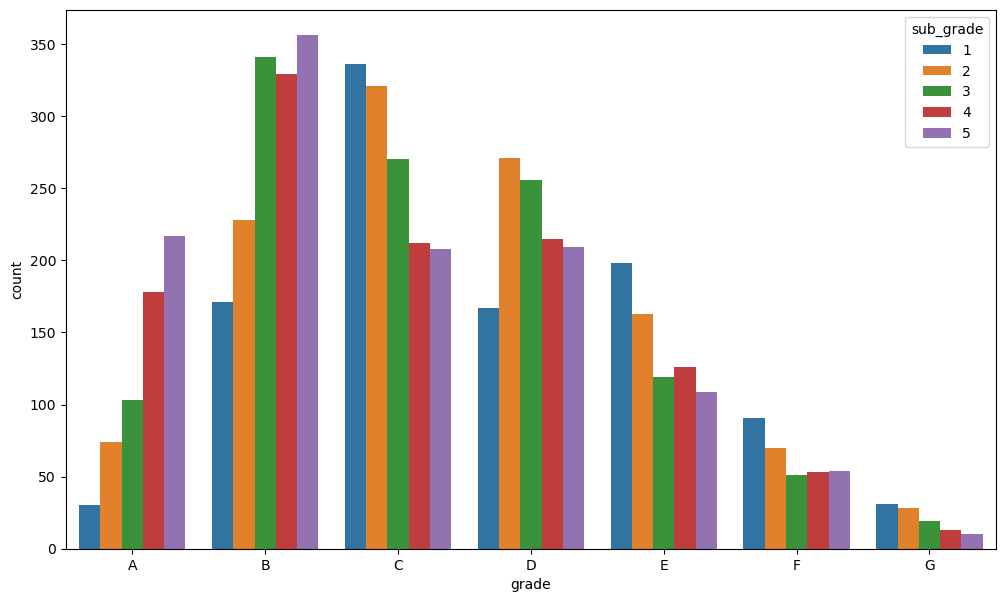

In [47]:
fig, ax = plt.subplots(figsize=(12,7))
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])

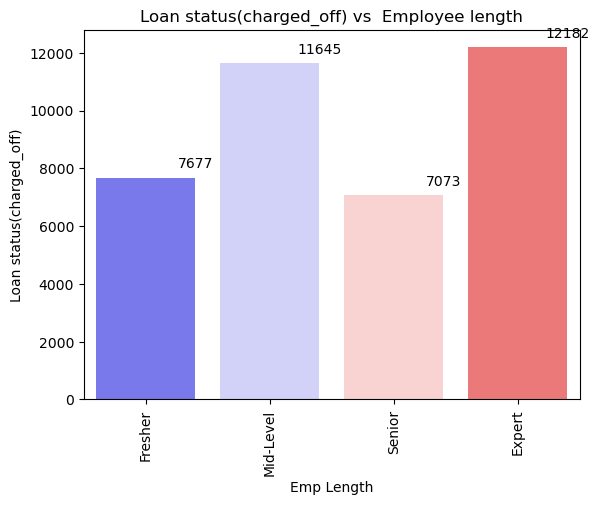

In [48]:
ax=sns.countplot(x = loan_df['emp_length_category'], data = loan_df[loan_df.loan_status == 'Charged Off'], palette='bwr') 
plt.title('Loan status(charged_off) vs  Employee length')
plt.xlabel('Emp Length')
plt.ylabel('Loan status(charged_off)')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()


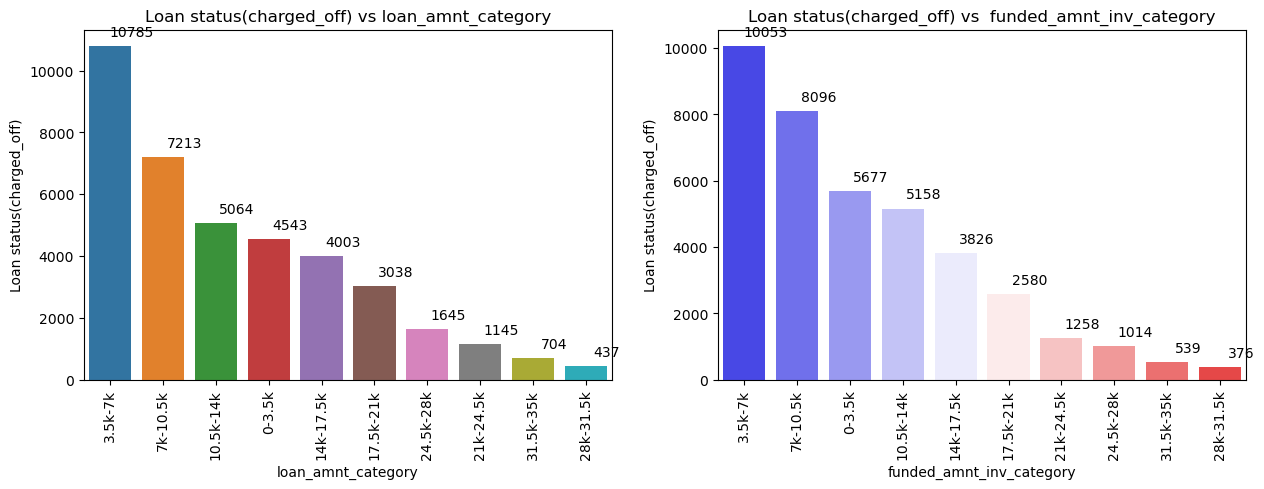

In [49]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
ax=sns.countplot(x = loan_df['loan_amnt_category'], data=loan_df[loan_df.loan_status == 'Charged Off'], order=loan_df.loan_amnt_category.value_counts().index)
plt.title('Loan status(charged_off) vs loan_amnt_category')
plt.xlabel('loan_amnt_category')
plt.ylabel('Loan status(charged_off)')
plt.xticks(rotation=90)
plt.subplot(222)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax=sns.countplot(x = loan_df['funded_amnt_inv_category'],  data=loan_df[loan_df.loan_status == 'Charged Off'], order=loan_df.funded_amnt_inv_category.value_counts().index,palette='bwr')
plt.title('Loan status(charged_off) vs  funded_amnt_inv_category')
plt.xlabel('funded_amnt_inv_category')
plt.ylabel('Loan status(charged_off)')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

<AxesSubplot:xlabel='issue_d_Year', ylabel='count'>

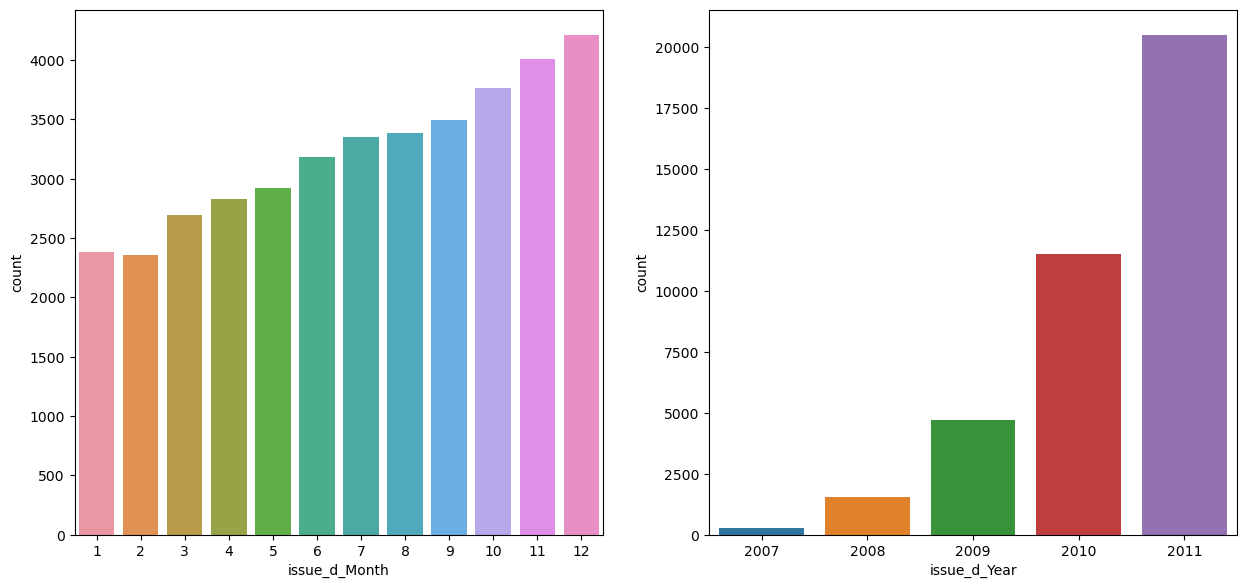

In [50]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_Month', data=loan_df)
plt.subplot(222)
sns.countplot(x='issue_d_Year', data=loan_df)


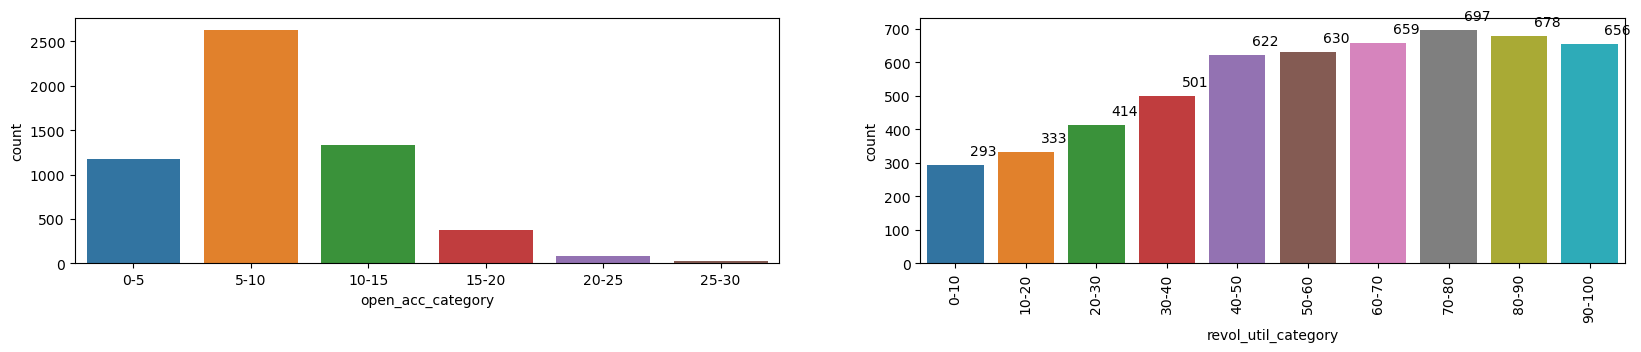

In [63]:
fig, ax = plt.subplots(figsize = (20,7))
plt.subplot(221)
ax=sns.countplot(x='open_acc_category', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.subplot(222)
ax=sns.countplot(x='revol_util_category', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

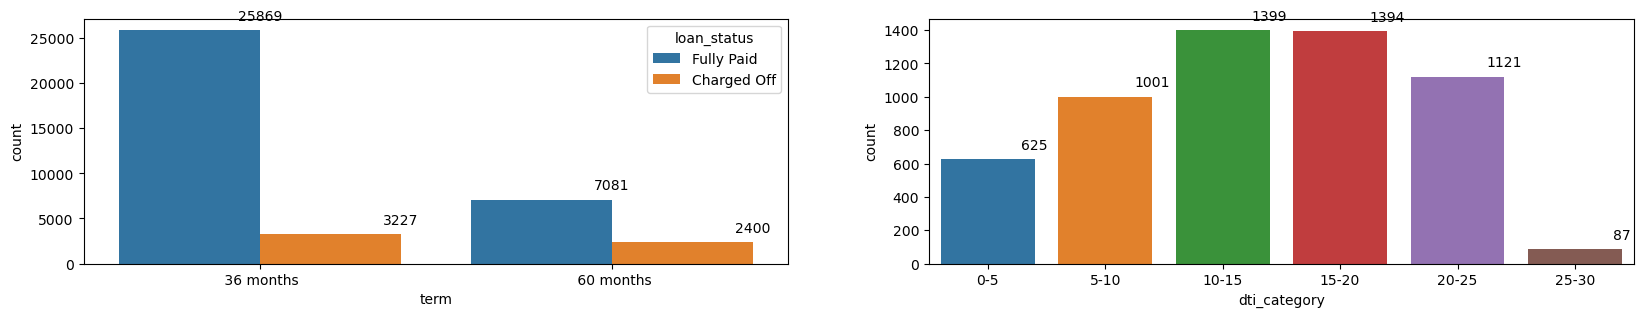

In [64]:
fig, ax = plt.subplots(figsize = (20,7))
plt.subplot(221)
ax=sns.countplot(x='term', hue='loan_status',data=loan_df)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(222)
ax=sns.countplot(x='dti_category', data=loan_df[loan_df['loan_status']=='Charged Off'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

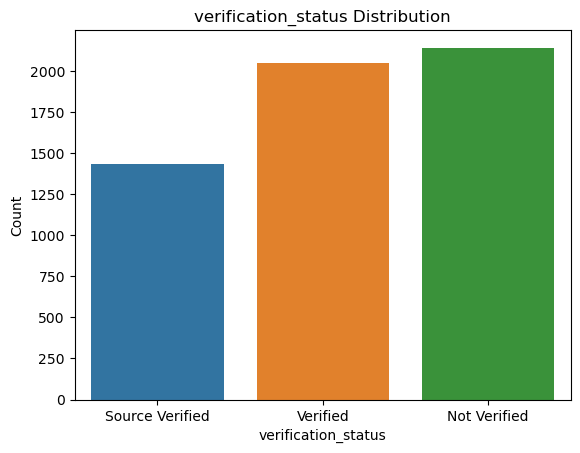

In [53]:
var = 'verification_status'
#Probability / Percentage of each values
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')
plt.show()

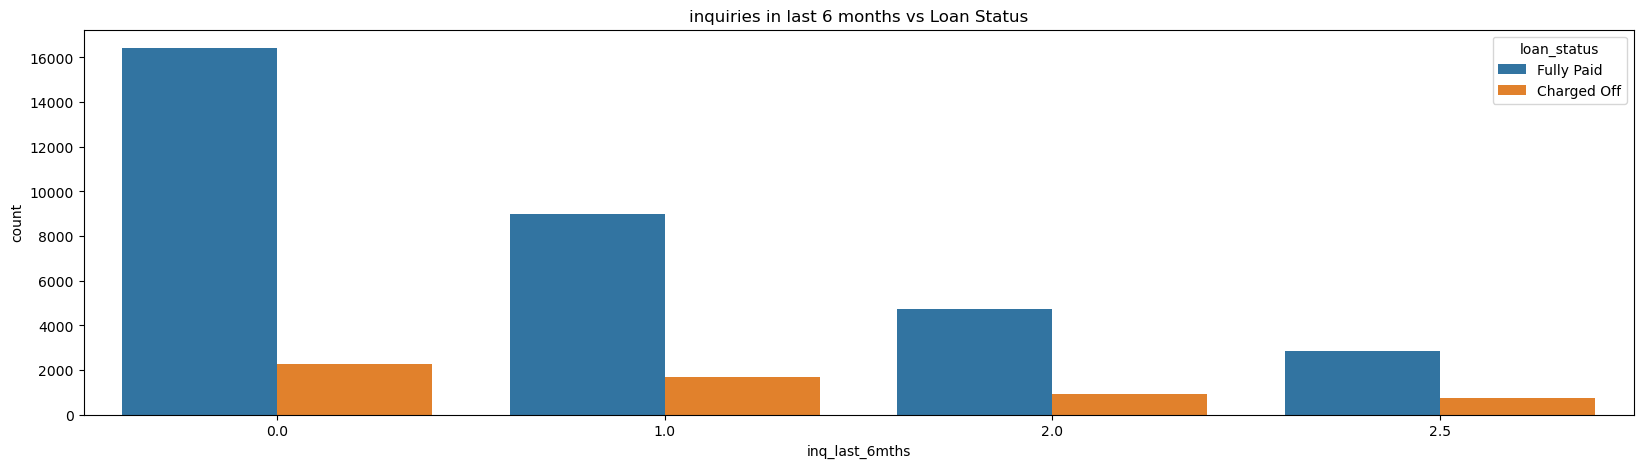

In [54]:
plt.figure(figsize=(20,5))
sns.countplot(loan_df.inq_last_6mths, hue='loan_status', data=loan_df)
plt.title('inquiries in last 6 months vs Loan Status')
plt.show()

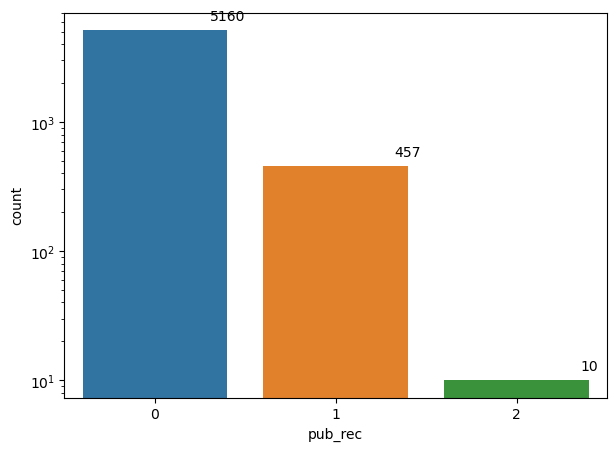

In [55]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
ax=sns.countplot(x='pub_rec', data=loan_df[loan_df.loan_status == 'Charged Off'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

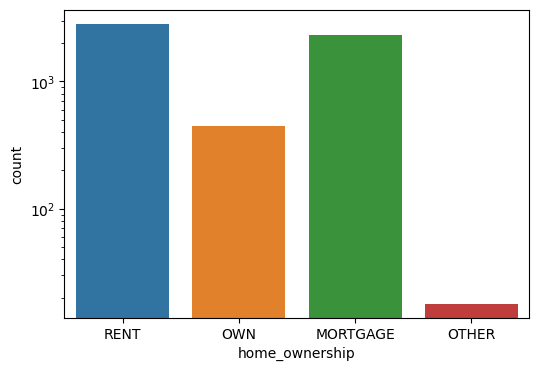

In [56]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

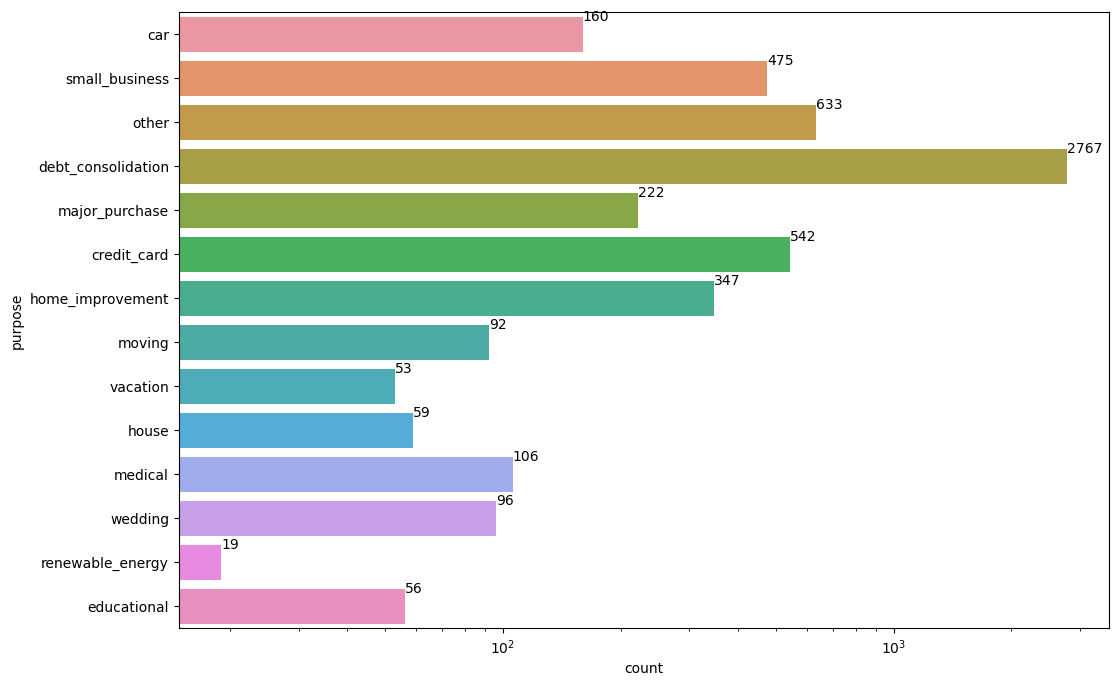

In [57]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
ax=sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()),ha = 'left', va = 'center')

#### DTI -- Debt to income ratio-- Target Variable
    - vs loan status
    - vs Purpose
    - vs Emp Length
    - vs Interest Rate

Text(0.5, 1.0, 'loan_status vs dti')

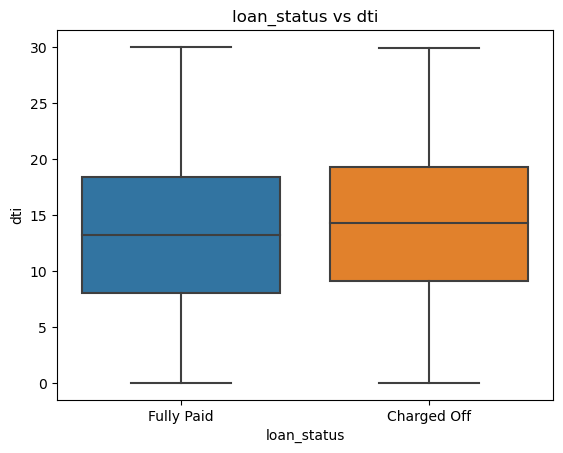

In [58]:
sns.boxplot(x='loan_status', y=loan_df.dti, data=loan_df)
plt.title('loan_status vs dti')

Text(0.5, 1.0, 'purpose vs dti')

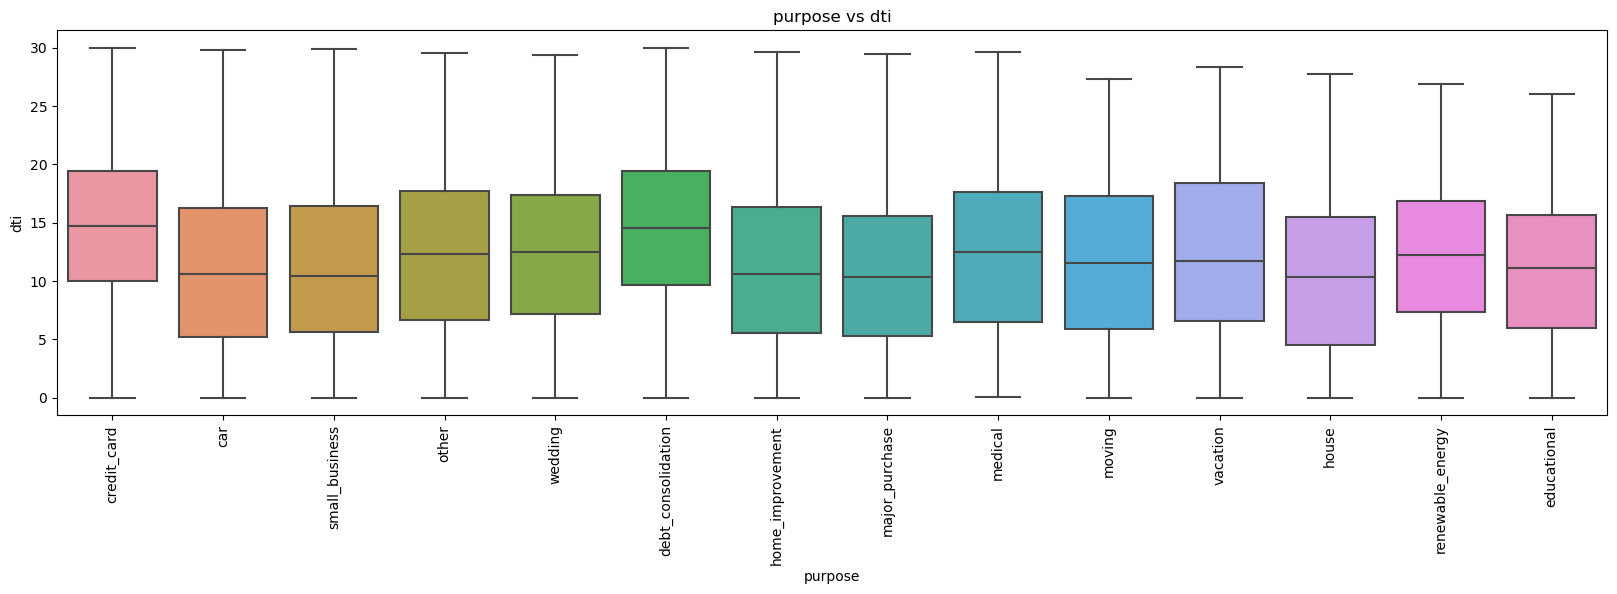

In [59]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.dti, data=loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

Text(0.5, 1.0, 'emp_length vs dti')

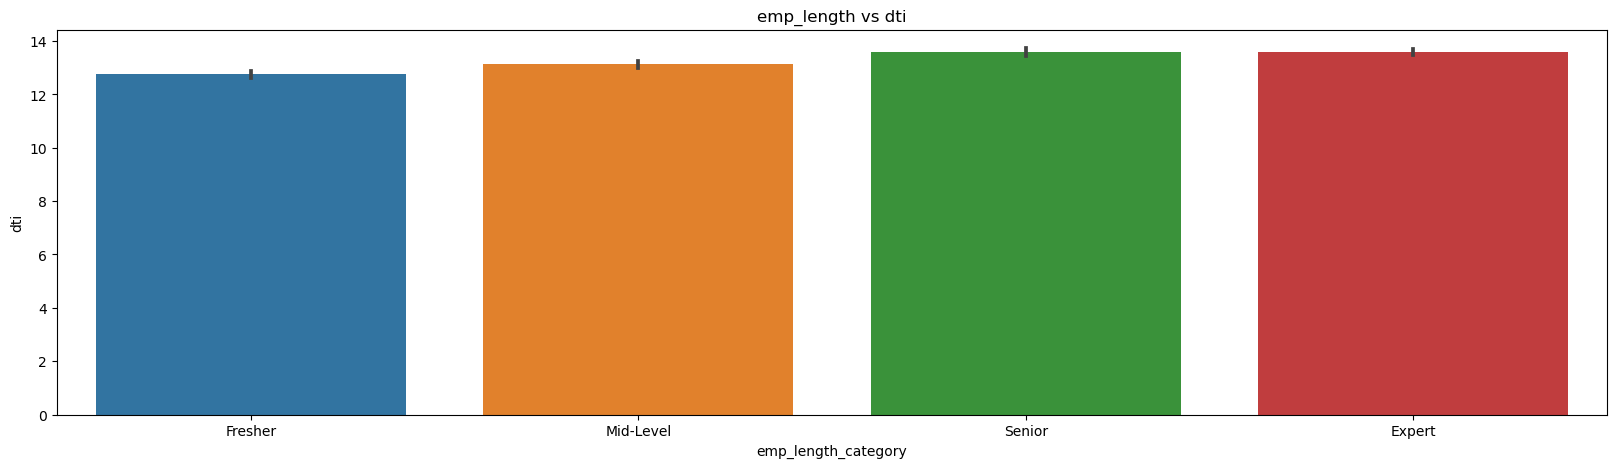

In [60]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='emp_length_category', y=loan_df.dti, data=loan_df)
plt.title('emp_length vs dti')


** Dti is almost same for the loan applicants across all the experience category **

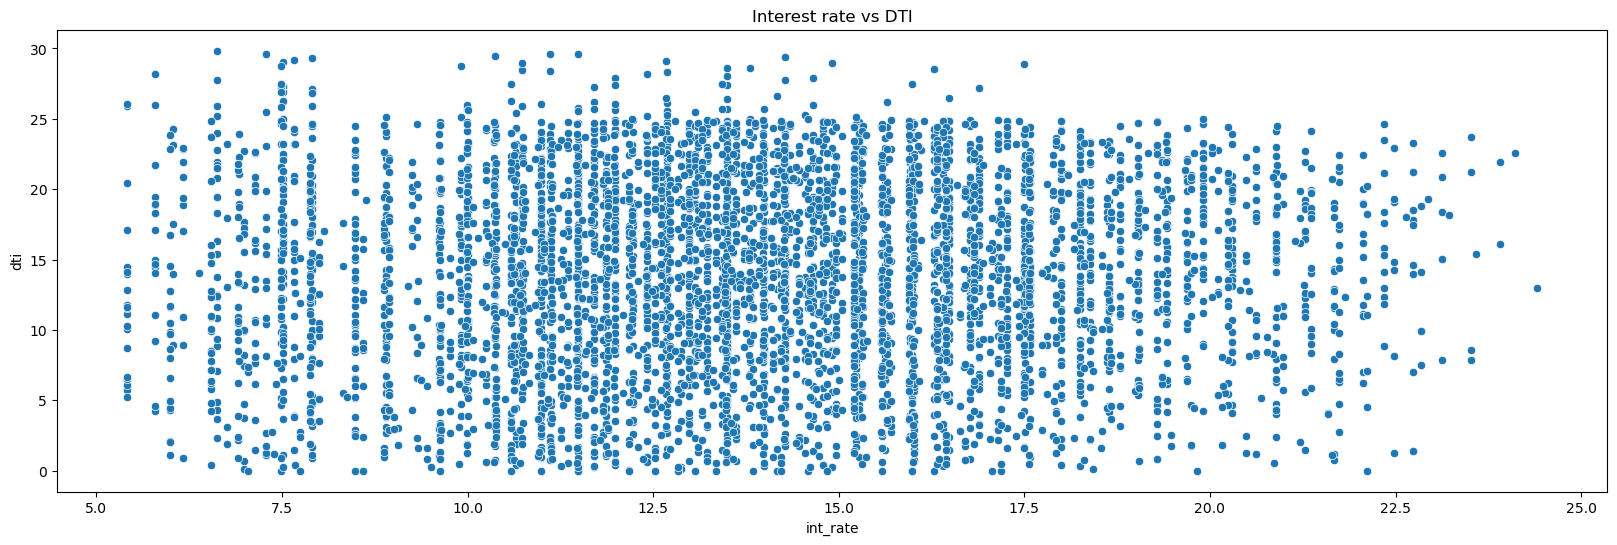

In [61]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.title('Interest rate vs DTI')
plt.show()

** Irresective values spread across,DTI is exceptionally high for interest rate between(5%-15%)

####  Observations
- only **13%** loan applicants have defaulted the loan
- **90%** of the applicants loan was approved by the investor
- Annual Income is  **left skewed** normal distribution ,therefore majority burrowers have relatively low income than others
- Maority of the Burrowers have taken **36 month** term to pay the loan off
- Majority of the applicants have **zero derogatory record**

##### Taking loan status (charged off) as target variable, the majority of the loan takers are defaulting in the below scearios when
- Applicants belongs to **A and B grades**
- for Grade C,E, F and G. sub grade 1 has defaulted the most compared to other subgrades but for A and B subgrade 1 is the that has defaulted the least
- Applicants who are charged of belong to **Expert Category**(i.e they have experience more than 7 years)
- funded amount is in the range of **3500-7000**
- Applicant whose loan was issued  in the year **2011** and in the month of **December**
- Burrower having **high credit utilization rate**(revolv util) 
- Applicants have taken **60 months** term period to pay the loan off
   there is only 11% default case in 36 month as compared to the ones who have taken loan in 60 months period
- Applicants given loan **without** proper **verification**
- Applicants having derogatory records
- Applicants having house_ownership as 'RENT'
- Applicants who have taken loans based on  following purpose: **consolidation, credit card, home improvement and small buisness**
- Applicants who have **5-10** open_acc
- When funded amount by investor is between 5000-10000
- Applicants whose DTI is inbetween **10-15**

##### DTI is taken as target Variable, Majority of the loan takers are defaulting in the below scenarios:
- Applicants having high DTI
-  Dti is almost same for the loan applicants across all the experience category 
- Irresective values spread across,DTI is exceptionally high for interest rate between(5%-15%)

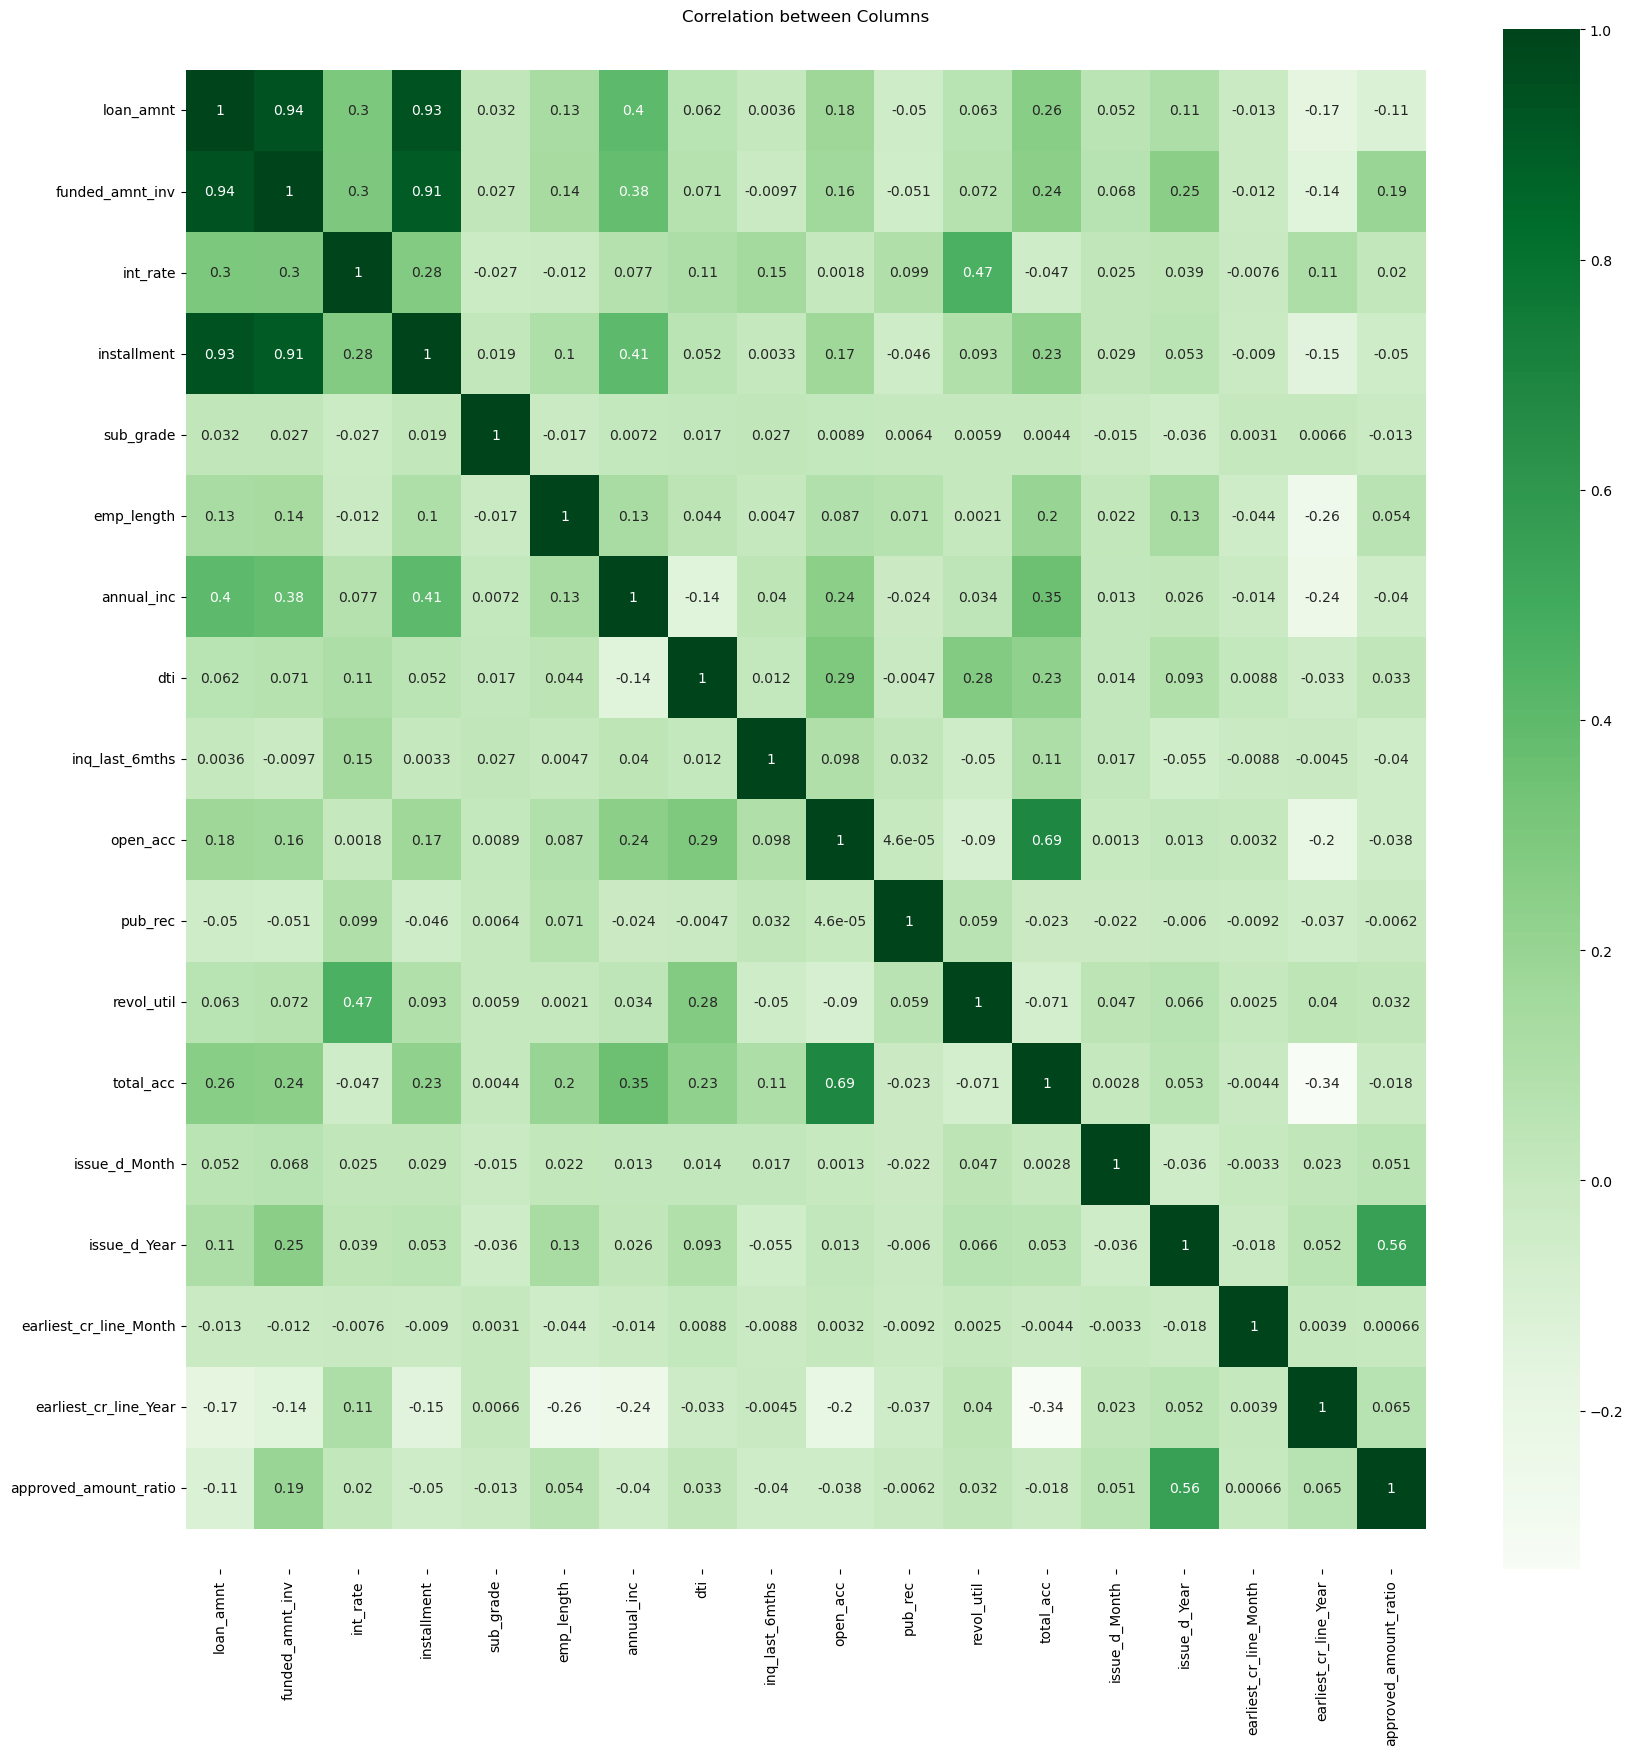

In [62]:
#Finding correlation matric
corr_matrix = loan_df.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

**Observation**
- Interest rates are high for Applicants with Credit card utilization.
- loan approved has high correlation with Year. 
